## Task 2
### Solving linear system by iterative method and Seidel method


In [232]:
from typing import Tuple
import numpy as np
from scipy import linalg
from enum import Enum
import matplotlib.pyplot as plt

In [233]:
def solve_with_seidel_method(
        matrix: np.ndarray,
        right_part: np.ndarray,
        eps: float,
        init_x: np.ndarray,
        max_steps: int = 10000,
) -> Tuple[np.ndarray, int]:
    n = matrix.shape[0]
    current_x = init_x

    for step in range(1, max_steps):
        next_x = np.zeros(n)

        for i in range(n):
            sum_1 = np.dot(matrix[i, :i], next_x[:i])
            sum_2 = np.dot(matrix[i, (i + 1):], current_x[(i + 1):])
            next_x[i] = -1 * (sum_1 + sum_2 - right_part[i]) / matrix[i][i]

        if linalg.norm(next_x - current_x) < eps:
            return next_x, step

        current_x = next_x

    return next_x, step

In [234]:
def solve_iterativly(
        B: np.ndarray,
        c: np.ndarray,
        eps: float,
        init_x: np.ndarray,
        limit: int = 10000,
) -> Tuple[np.ndarray, int]:
    current_x = init_x

    for step in range(1, limit):
        previous_x = current_x
        current_x = B.dot(current_x) + c

        if (
                linalg.norm(B) < 1 and linalg.norm(current_x - previous_x) * linalg.norm(B) / (1 - linalg.norm(B)) < eps # aposteriori error
                or linalg.norm(B) >= 1 and linalg.norm(current_x - previous_x) < eps
        ):
            return current_x, step

    return current_x, step

In [235]:
def convert_to_iteration_matrix(
        matrix: np.ndarray,
        right_part: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    n = matrix.shape[0]

    B = np.ndarray((n, n))
    c = np.ndarray(n)

    for i in range(n):
        for j in range(n):
            B[i][j] = 0 if i == j else -matrix[i][j] / matrix[i][i]
            c[i] = right_part[i] / matrix[i][i]
    
    return B, c

In [236]:
class SolvingMethod(Enum):
    SEIDEL = 'seidel'
    ITERATIVE = 'iterative'

def run_test(matrix: np.ndarray, right_part: np.ndarray, method: SolvingMethod, true_result: np.ndarray):
    epsilons = []
    steps = []
    result = np.zeros(1)
    init_x = np.zeros(matrix.shape[0])

    for i in range (-2, -10, -1):
        eps = 10 ** i
        epsilons.append(eps)

        if method == SolvingMethod.ITERATIVE:
            B, c = convert_to_iteration_matrix(np.copy(matrix), np.copy(right_part))
            calculated_result, iterations = solve_iterativly(np.copy(B), np.copy(c), eps, np.copy(init_x))
        else:
            calculated_result, iterations = solve_with_seidel_method(np.copy(matrix), np.copy(right_part), eps, np.copy(init_x))
        steps.append(iterations)
    
    result = calculated_result
    print("Calculated result: \n", result)
    print("True result: \n", true_result)

    print("Success! Result is correct!" if np.allclose(result, true_result) else "Failed! Ax != b")

    plt.figure(figsize=(6, 3))
    plt.plot(epsilons, steps, label='Steps to find value with epsilon', color='red')
    plt.xscale('log')
    plt.xlabel('epsilon')
    plt.ylabel('steps')
    plt.grid()
    plt.show()

In [237]:
import random

def generate_diagonal_dominance_matrix(size):
    matrix = np.zeros((size, size))
    for i in range(size):
        diagonal_value = 0
        while diagonal_value == 0:
            diagonal_value = random.randint(-10, 10)
        matrix[i][i] = diagonal_value
        remaining_sum = max(0, abs(diagonal_value) - 1)
        for j in range(size):
            if i == j:
                continue

            chosen_value = random.randint(-remaining_sum, remaining_sum)
            matrix[i][j] = chosen_value
            remaining_sum = max(0, remaining_sum - abs(chosen_value))

    return np.array(matrix)

### Test 1
#### Diagonally dominant matrix

A: 
 [[  6.   3.   1.  -1.   0.]
 [ -1.   9.  -3.   2.  -2.]
 [  7.   2. -10.   0.   0.]
 [  0.   0.   0.   1.   0.]
 [  0.  -2.  -1.   0.  -4.]]
b:  [ 7.21363441 -0.02182133  0.72757066  0.34709658 -4.13408236]
Results for Seidel method:
Calculated result: 
 [0.94930169 0.3978646  0.67132704 0.34709658 0.66675653]
True result: 
 [0.94930169 0.3978646  0.67132704 0.34709658 0.66675653]
Success! Result is correct!


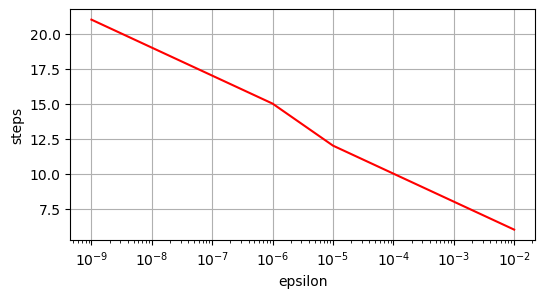

Results for Iterative method:
Calculated result: 
 [0.94930169 0.3978646  0.67132704 0.34709658 0.66675653]
True result: 
 [0.94930169 0.3978646  0.67132704 0.34709658 0.66675653]
Success! Result is correct!


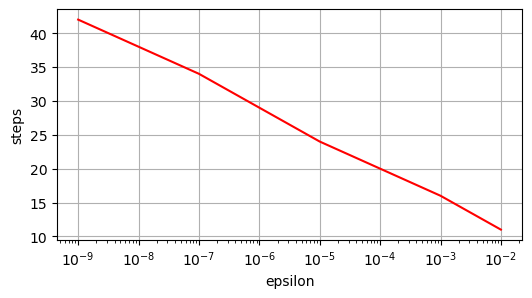

In [238]:
n = 5
A = generate_diagonal_dominance_matrix(n)

x = np.array(np.random.rand(n))
b = np.matmul(A, x)

print("A: \n", A)
print("b: ", b)

print("Results for Seidel method:")
run_test(A, b, SolvingMethod.SEIDEL, x)

print("Results for Iterative method:")
run_test(A, b, SolvingMethod.ITERATIVE, x)

### Test 2
#### Big Diagonally dominant matrix

n:  200
A: 
 [[-9.  6.  2. ...  0.  0.  0.]
 [-3. -6.  1. ...  0.  0.  0.]
 [-6. -1. -8. ...  0.  0.  0.]
 ...
 [ 2.  1.  0. ...  4.  0.  0.]
 [-5.  0.  0. ...  0. -6.  0.]
 [ 3.  3.  0. ...  0.  0.  9.]]
b:  [ 4.77822096e+00 -4.70285392e+00 -7.45553738e+00  7.74885876e+00
  7.17028782e+00  6.81206186e-01 -1.11682687e+00  7.54536756e+00
  2.18798434e-01  3.24014388e+00  5.67846796e+00  7.83715062e+00
  1.46719868e-01  1.38013281e+00 -1.71267083e+00 -1.00983573e+00
  1.22081234e+00  1.84689386e+00 -1.52595794e+00  3.04079742e+00
  5.83356409e-01 -2.98201235e+00  9.75434551e+00 -1.96885359e+00
  7.97007497e-03  2.48127245e+00  4.90433186e-01 -7.50903121e-01
 -1.94449462e+00 -1.64849092e+00 -1.75511255e+00  6.51933031e-01
  9.50221440e-01  1.45921220e+00  2.60180849e+00 -1.03028175e+00
 -2.49572653e+00 -2.31321637e+00  4.92991527e+00  1.78183562e+00
 -8.38931419e+00  2.64436800e-02 -1.30151293e+00  5.47304361e+00
 -1.40607351e+00 -3.00750417e+00 -3.72415315e+00  3.04937021e+00
  3.1097974

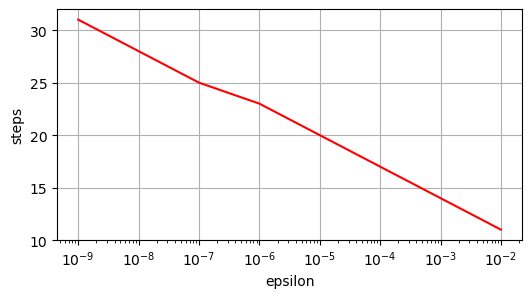

Results for Iterative method:
Calculated result: 
 [0.10256352 0.69413107 0.76825315 0.98550656 0.9986301  0.68120619
 0.02300105 0.74305998 0.27472736 0.14693127 0.56185637 0.77962694
 0.02285952 0.19389519 0.76807946 0.71982062 0.50255835 0.53932036
 0.45841213 0.94522346 0.58335641 0.2808919  0.99264859 0.28082944
 0.00511784 0.22908118 0.29649836 0.75090312 0.1302595  0.74668615
 0.66359267 0.37724828 0.2483648  0.11639131 0.79889381 0.60899211
 0.24434715 0.09863738 0.66983762 0.14798327 0.71855284 0.36028737
 0.5994747  0.69397419 0.47552611 0.79459418 0.5155423  0.41221987
 0.74301609 0.59820486 0.74194933 0.41182856 0.15242456 0.6104735
 0.5254558  0.96378643 0.80285793 0.7097902  0.85596947 0.99487698
 0.88012971 0.14920431 0.14887752 0.09512934 0.89513435 0.92164495
 0.52416782 0.30399313 0.71563118 0.7808275  0.3841142  0.82930574
 0.31443118 0.19499844 0.27879037 0.39255818 0.09299522 0.477851
 0.5913033  0.67636803 0.40892571 0.17517138 0.44779855 0.51244495
 0.49223949 0.

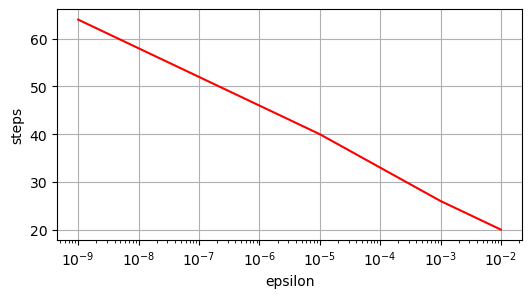

In [239]:
n = 200
A = generate_diagonal_dominance_matrix(n)

x = np.array(np.random.rand(n))
b = np.matmul(A, x)

print("n: ", n)
print("A: \n", A)
print("b: ", b)

print("Results for Seidel method:")
run_test(A, b, SolvingMethod.SEIDEL, x)

print("Results for Iterative method:")
run_test(A, b, SolvingMethod.ITERATIVE, x)